# 1, 2 oder 3

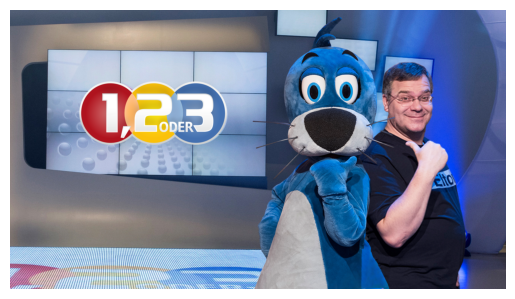

In [1]:
import matplotlib.pyplot as plt
# Load and display the image
image = plt.imread('123-teaser.png')
plt.imshow(image)

# Remove the axis labels and ticks
plt.axis('off')

# Show the image
plt.show()

# Linear Regression, Polynominal Regression oder Random Forest Regression

In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/salomekoller/Documents/ovulation_application/ki-anwendung/data


#### Import the Mens Data

In [3]:
dfmens1 = pd.read_csv('../backend/menstrual_cycle_data_enriched_per_CYCLE.csv', sep=',', encoding='utf-8')

print(dfmens1.shape)
dfmens1.head(5)

(1665, 16)


,ClientID,CycleNumber,LengthofCycle,lengthCycle_cat,CycleWithPeakorNot,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,lengthMenses_cat,Age,Height,Weight,BMI
0,nfp8122,1,29,28 - 32,1.0,17,12,12,5,9,5,Normal,36.0,160.02,54.43,21.25
1,nfp8122,2,27,28 - 32,1.0,15,12,13,2,6,5,Normal,36.0,160.02,54.43,21.25
2,nfp8122,3,29,28 - 32,1.0,15,14,11,1,5,5,Normal,36.0,160.02,54.43,21.25
3,nfp8122,4,27,28 - 32,1.0,15,12,13,2,6,5,Normal,36.0,160.02,54.43,21.25
4,nfp8122,5,28,28 - 32,1.0,16,12,12,4,8,5,Normal,36.0,160.02,54.43,21.25


#### Create Train and Test Splits

In [4]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(dfmens1[['LengthofCycle',
                                                        'LengthofMenses',
                                                        'Age',
                                                        'Weight',
                                                        'Height']], 
                                                         dfmens1['FirstDayofHigh'], 
                                                        test_size=0.20, 
                                                        random_state=42)

#### Short Overview of the used Datapoints in Relation to the Target Variable (FirstDayofHigh)

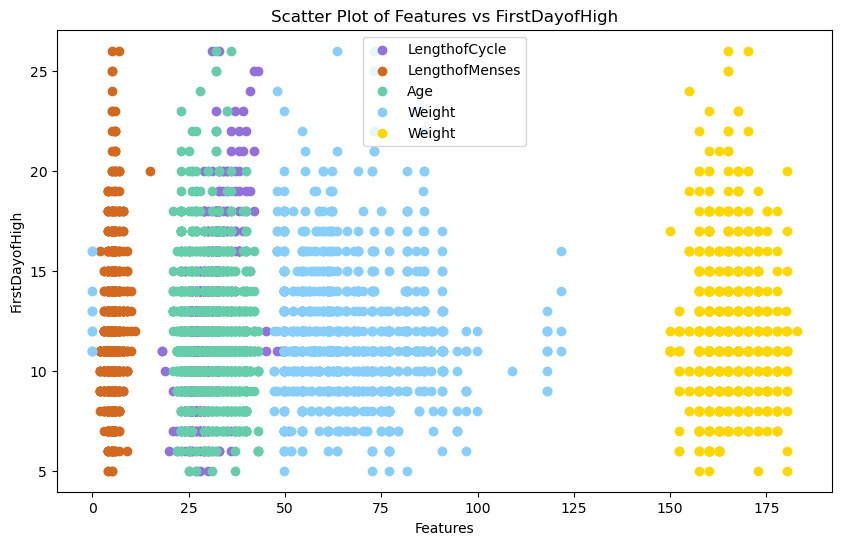

In [5]:
# Create a scatter plot of the features and target variable
plt.figure(figsize=(10, 6))
plt.scatter(X_train['LengthofCycle'], y_train, label='LengthofCycle', color='mediumpurple')
plt.scatter(X_train['LengthofMenses'], y_train, label='LengthofMenses', color='chocolate')
plt.scatter(X_train['Age'], y_train, label='Age', color='mediumaquamarine')
plt.scatter(X_train['Weight'], y_train, label='Weight', color='lightskyblue')
plt.scatter(X_train['Height'], y_train, label='Weight', color='gold')
plt.xlabel('Features')
plt.ylabel('FirstDayofHigh')
plt.title('Scatter Plot of Features vs FirstDayofHigh')
plt.legend()
plt.show()

### Linear Regression

In [6]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

scores = cross_val_score(linear_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(linear_model))

linear_reg_mean_score = np.mean(scores)

print(scores)
print(linear_reg_mean_score) 

--LinearRegression()--
[-2.86851673 -2.41806697 -2.74097926 -2.61876203 -2.54940154]
-2.639145306535119


--LinearRegression()--
[2.86851673 2.41806697 2.74097926 2.61876203 2.54940154]
2.639145306535119


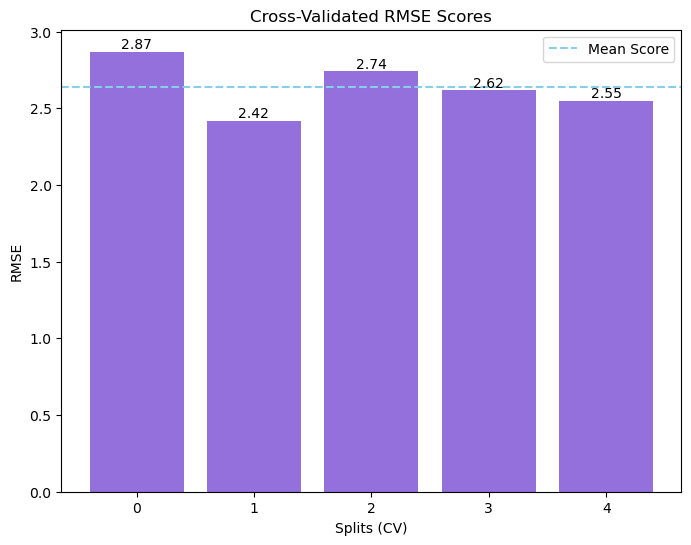

In [7]:
# Convert scores to positive values
scores = -scores
linear_reg_mean_score = -linear_reg_mean_score

# Print the model name, scores, and mean score
print('--{}--'.format(linear_model))
print(scores)
print(np.mean(scores))

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores, color='mediumpurple')
plt.xlabel('Splits (CV)')
plt.ylabel('RMSE')
plt.title('Cross-Validated RMSE Scores')
plt.xticks(range(len(scores)))

# Add annotations to the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
    
# Add a line for the mean score
plt.axhline(linear_reg_mean_score, color='skyblue', linestyle='--', label='Mean Score') # type: ignore
plt.legend()
    
plt.show()

### Polynominal Regression

In [8]:
# Define the range of degrees to try
degrees = range(1, 6)

# Initialize an empty list to store the mean RMSE scores
mean_rmse_scores = []

# Iterate over each degree
for degree in degrees:
    # Create the polynomial regression model pipeline
    polynomial_model = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("linear_regression", LinearRegression())
    ])

    # Perform cross-validation and calculate RMSE scores
    scores = cross_val_score(polynomial_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)

    # Convert the scores to positive values and calculate the mean
    mean_rmse = np.mean(np.abs(scores))

    # Append the mean RMSE score to the list
    mean_rmse_scores.append(mean_rmse)

# Find the best degree with the lowest mean RMSE score
best_degree = degrees[np.argmin(mean_rmse_scores)]
best_rmse = np.min(mean_rmse_scores)

# Print the results
print("Best Degree:", best_degree)
print("Best RMSE:",  mean_rmse_scores)

Best Degree: 2
Best RMSE: [2.639145306535119, 2.6175282166394984, 2.706351053545562, 3.189565558008942, 16.94081513741296]


In [9]:
polynomial_model = Pipeline([
                                ("polynomial_features", PolynomialFeatures(degree=best_degree, include_bias=False)),
                                ("linear_regression", LinearRegression()),
                            ])

scores = cross_val_score(polynomial_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(polynomial_model))

poly_reg_mean_score = np.mean(scores)
print(scores)
print(poly_reg_mean_score) 

--Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])--
[-2.8019031  -2.45293411 -2.72277971 -2.57609873 -2.53392543]
-2.6175282166394984


--Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])--
[2.8019031  2.45293411 2.72277971 2.57609873 2.53392543]
2.6175282166394984


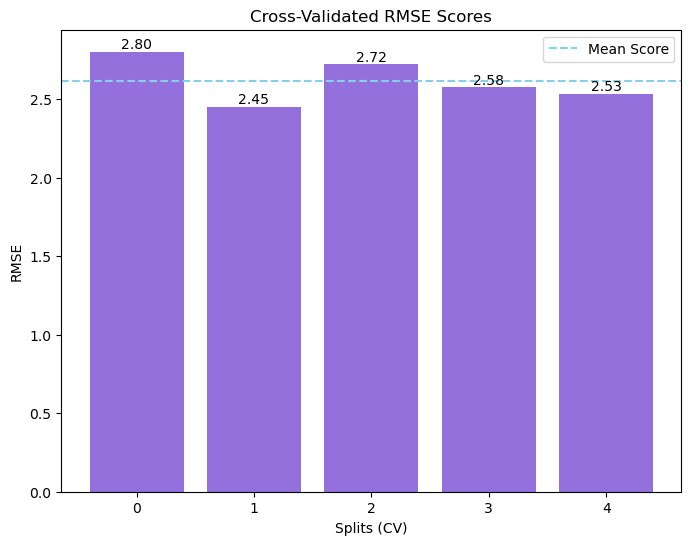

In [10]:
# Convert scores to positive values
scores = -scores
poly_reg_mean_score = -poly_reg_mean_score

# Print the model name, scores, and mean score
print('--{}--'.format(polynomial_model))
print(scores)
print(np.mean(scores))

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores, color='mediumpurple')
plt.xlabel('Splits (CV)')
plt.ylabel('RMSE')
plt.title('Cross-Validated RMSE Scores')
plt.xticks(range(len(scores)))

# Add annotations to the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Add a line for the mean score
plt.axhline(poly_reg_mean_score, color='skyblue', linestyle='--', label='Mean Score') # type: ignore
plt.legend()

plt.show()

### Random Forest Regression

In [11]:
# Random State is a random number generator. Es sollten immer 42 gezogen werden und ist so konistent und vergleichbar.
randomforest_model = RandomForestRegressor(random_state=42)

scores = cross_val_score(randomforest_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(randomforest_model))

randforest_reg_mean_score = np.mean(scores)

print(scores)
print(randforest_reg_mean_score) 

--RandomForestRegressor(random_state=42)--
[-2.61289904 -2.48805162 -2.28525118 -2.58772314 -2.45821598]
-2.486428193442722


--RandomForestRegressor(random_state=42)--
[2.61289904 2.48805162 2.28525118 2.58772314 2.45821598]
2.486428193442722


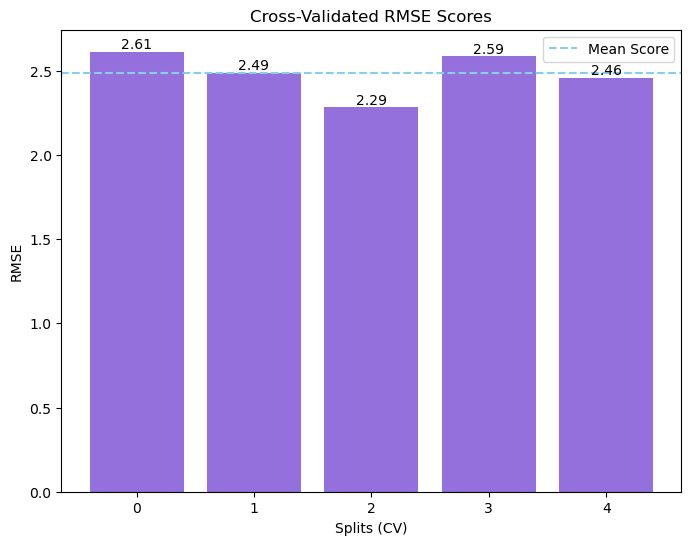

In [12]:
# Convert scores to positive values
scores = -scores
randforest_reg_mean_score = -randforest_reg_mean_score

# Print the model name, scores, and mean score
print('--{}--'.format(randomforest_model))
print(scores)
print(np.mean(scores))

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores, color='mediumpurple')
plt.xlabel('Splits (CV)')
plt.ylabel('RMSE')
plt.title('Cross-Validated RMSE Scores')
plt.xticks(range(len(scores)))

# Add annotations to the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Add a line for the mean score
plt.axhline(randforest_reg_mean_score, color='skyblue', linestyle='--', label='Mean Score') # type: ignore
plt.legend()

plt.show()

## More Models: Decision Tree Regression, Lasso, LassoLars and Ridge

### Decision Tree Regression

GridSearch CV

In [13]:
# Define the parameter grid
param_grid = {'max_depth': [2, 3, 4, 5, 6, 8, 10]}

# Create the DecisionTreeRegressor model
decisionTreeRegressor = tree.DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(decisionTreeRegressor, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
best_rmse = np.min(mean_rmse_scores)

print('Best max_depth:', best_max_depth)
print("Best RMSE:", best_rmse)


Best max_depth: 6
Best RMSE: 2.6175282166394984


[Text(0.5300245098039216, 0.9285714285714286, 'x[0] <= 30.5\nsquared_error = 8.516\nsamples = 1332\nvalue = 11.617'),
 Text(0.3075980392156863, 0.7857142857142857, 'x[0] <= 28.5\nsquared_error = 4.602\nsamples = 938\nvalue = 10.857'),
 Text(0.1568627450980392, 0.6428571428571429, 'x[2] <= 24.5\nsquared_error = 3.549\nsamples = 666\nvalue = 10.53'),
 Text(0.0784313725490196, 0.5, 'x[4] <= 166.37\nsquared_error = 2.205\nsamples = 148\nvalue = 11.108'),
 Text(0.0392156862745098, 0.35714285714285715, 'x[0] <= 26.5\nsquared_error = 1.655\nsamples = 122\nvalue = 10.869'),
 Text(0.0196078431372549, 0.21428571428571427, 'x[4] <= 162.56\nsquared_error = 1.43\nsamples = 61\nvalue = 10.475'),
 Text(0.00980392156862745, 0.07142857142857142, 'squared_error = 1.467\nsamples = 54\nvalue = 10.574'),
 Text(0.029411764705882353, 0.07142857142857142, 'squared_error = 0.49\nsamples = 7\nvalue = 9.714'),
 Text(0.058823529411764705, 0.21428571428571427, 'x[4] <= 162.56\nsquared_error = 1.571\nsamples = 61\n

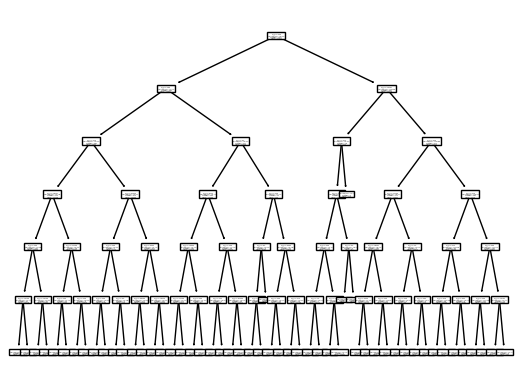

In [14]:
# Fit Regression Model
decisionTreeRegressor = tree.DecisionTreeRegressor(max_depth=best_max_depth)
decisionTreeRegressor = decisionTreeRegressor.fit(X_train, y_train)
tree.plot_tree(decisionTreeRegressor)

In [15]:
scores = cross_val_score(decisionTreeRegressor, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(decisionTreeRegressor))

dectree_reg_mean_score = np.mean(scores)
dectree_reg_mean_score = -dectree_reg_mean_score

print(scores)
print(dectree_reg_mean_score) 

--DecisionTreeRegressor(max_depth=6)--
[-2.53751138 -2.56474752 -2.53212784 -2.72931532 -2.91166563]
2.655073538241867


### Lasso

GridSearch CV

In [16]:
# Define the parameter grid
param_grid = {
    'alpha': np.linspace(0.0001, 2, num=100)  # Generate 100 values
}

# Create the Lasso model
lasso_model = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print('Best alpha:', best_alpha)
print(mean_rmse_scores)

Best alpha: 0.06070303030303031
[2.639145306535119, 2.6175282166394984, 2.706351053545562, 3.189565558008942, 16.94081513741296]


In [17]:
lasso_model = Lasso(alpha=best_alpha)

scores = cross_val_score(lasso_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(lasso_model))

lasso_reg_mean_score = np.mean(scores)

print(scores)
print(lasso_reg_mean_score) 

--Lasso(alpha=0.06070303030303031)--
[-2.87604088 -2.41667766 -2.73770597 -2.61580785 -2.54724447]
-2.6386953674975944


--Lasso(alpha=0.06070303030303031)--
[2.87604088 2.41667766 2.73770597 2.61580785 2.54724447]
2.6386953674975944


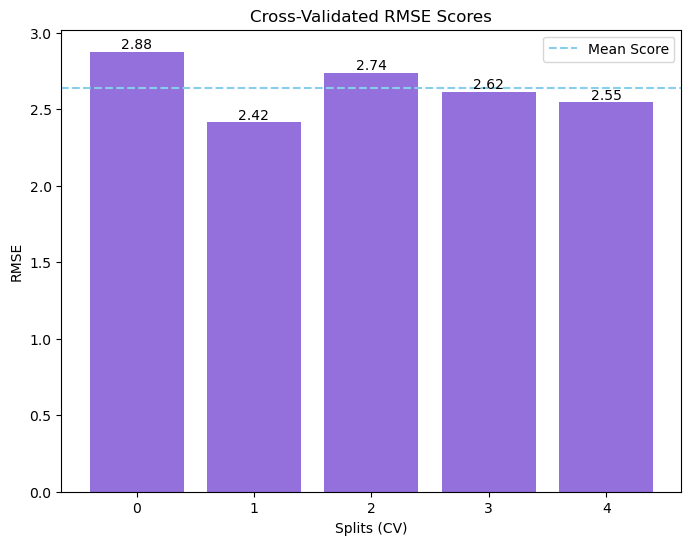

In [18]:
# Convert scores to positive values
scores = -scores
lasso_reg_mean_score = -lasso_reg_mean_score

# Print the model name, scores, and mean score
print('--{}--'.format(lasso_model))
print(scores)
print(np.mean(scores))

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores, color='mediumpurple')
plt.xlabel('Splits (CV)')
plt.ylabel('RMSE')
plt.title('Cross-Validated RMSE Scores')
plt.xticks(range(len(scores)))

# Add annotations to the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Add a line for the mean score
plt.axhline(lasso_reg_mean_score, color='skyblue', linestyle='--', label='Mean Score') # type: ignore
plt.legend()


plt.show()

### Lasso Lars

GridSearch CV

In [19]:
# Define the parameter grid
param_grid = {
    'alpha': np.linspace(0.0001, 2, num=100)  # Generate 100 values
}

# Create the Lasso model
lassolars_model = LassoLars()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lassolars_model, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print('Best alpha:', best_alpha)
print(mean_rmse_scores)

Best alpha: 0.06070303030303031
[2.639145306535119, 2.6175282166394984, 2.706351053545562, 3.189565558008942, 16.94081513741296]


In [20]:
lassolars_model = LassoLars(alpha=best_alpha)

scores = cross_val_score(lassolars_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(lassolars_model))

lassolars_reg_mean_score = np.mean(scores)

print(scores)
print(lassolars_reg_mean_score) 

--LassoLars(alpha=0.06070303030303031)--
[-2.87604094 -2.41667751 -2.73770609 -2.61580789 -2.54724438]
-2.638695363303806


--LassoLars(alpha=0.06070303030303031)--
[2.87604094 2.41667751 2.73770609 2.61580789 2.54724438]
2.638695363303806


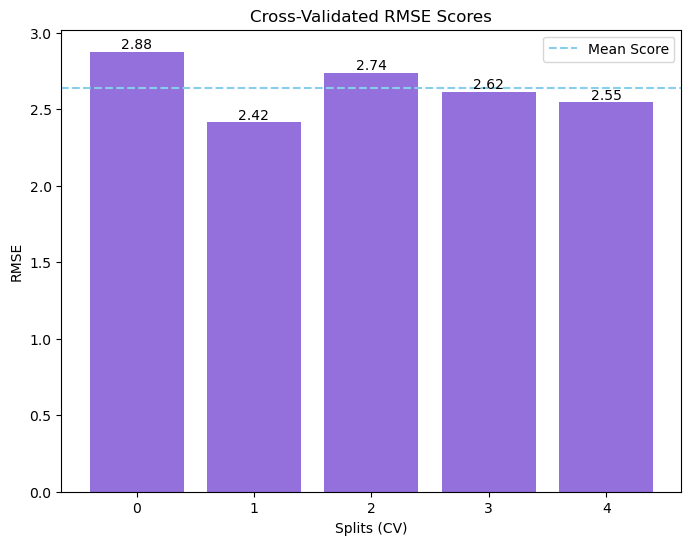

In [21]:
# Convert scores to positive values
scores = -scores
lassolars_reg_mean_score = -lassolars_reg_mean_score

# Print the model name, scores, and mean score
print('--{}--'.format(lassolars_model))
print(scores)
print(np.mean(scores))

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores, color='mediumpurple')
plt.xlabel('Splits (CV)')
plt.ylabel('RMSE')
plt.title('Cross-Validated RMSE Scores')
plt.xticks(range(len(scores)))

# Add annotations to the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Add a line for the mean score
plt.axhline(lassolars_reg_mean_score, color='skyblue', linestyle='--', label='Mean Score') # type: ignore
plt.legend()

plt.show()

### Ridge

GridSearch CV

In [22]:
# Define the parameter grid
param_grid = {
    'alpha': np.linspace(0.01, 100, num=100)  # Generate 100 values
}

# Create the Lasso model
ridge_model = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print('Best alpha:', best_alpha)
print(mean_rmse_scores)

Best alpha: 100.0
[2.639145306535119, 2.6175282166394984, 2.706351053545562, 3.189565558008942, 16.94081513741296]


In [23]:
ridge_model = Ridge(alpha=best_alpha)

scores = cross_val_score(ridge_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(ridge_model))

ridge_reg_mean_score = np.mean(scores)

print(scores)
print(ridge_reg_mean_score) 

--Ridge(alpha=100.0)--
[-2.8698442  -2.41800661 -2.74009039 -2.61726337 -2.54856695]
-2.6387543040242205


--Ridge(alpha=100.0)--
[2.8698442  2.41800661 2.74009039 2.61726337 2.54856695]
2.6387543040242205


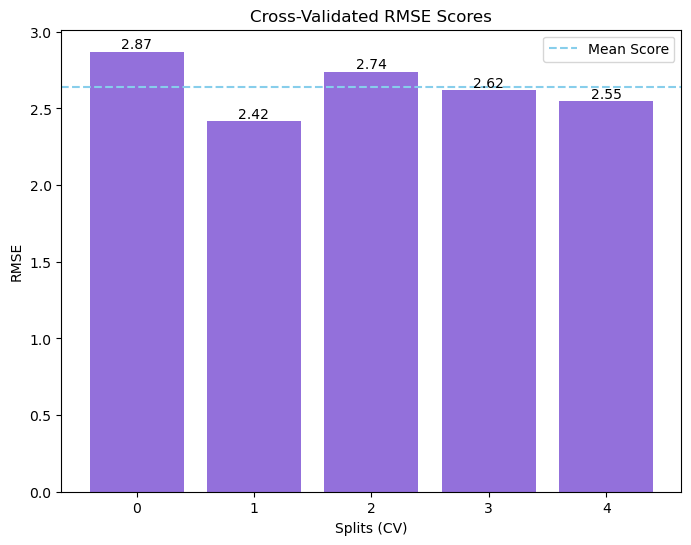

In [24]:
# Convert scores to positive values
scores = -scores
ridge_reg_mean_score = -ridge_reg_mean_score

# Print the model name, scores, and mean score
print('--{}--'.format(ridge_model))
print(scores)
print(np.mean(scores))

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores, color='mediumpurple')
plt.xlabel('Splits (CV)')
plt.ylabel('RMSE')
plt.title('Cross-Validated RMSE Scores')
plt.xticks(range(len(scores)))

# Add annotations to the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Add a line for the mean score
plt.axhline(ridge_reg_mean_score, color='skyblue', linestyle='--', label='Mean Score') # type: ignore
plt.legend()

plt.show()

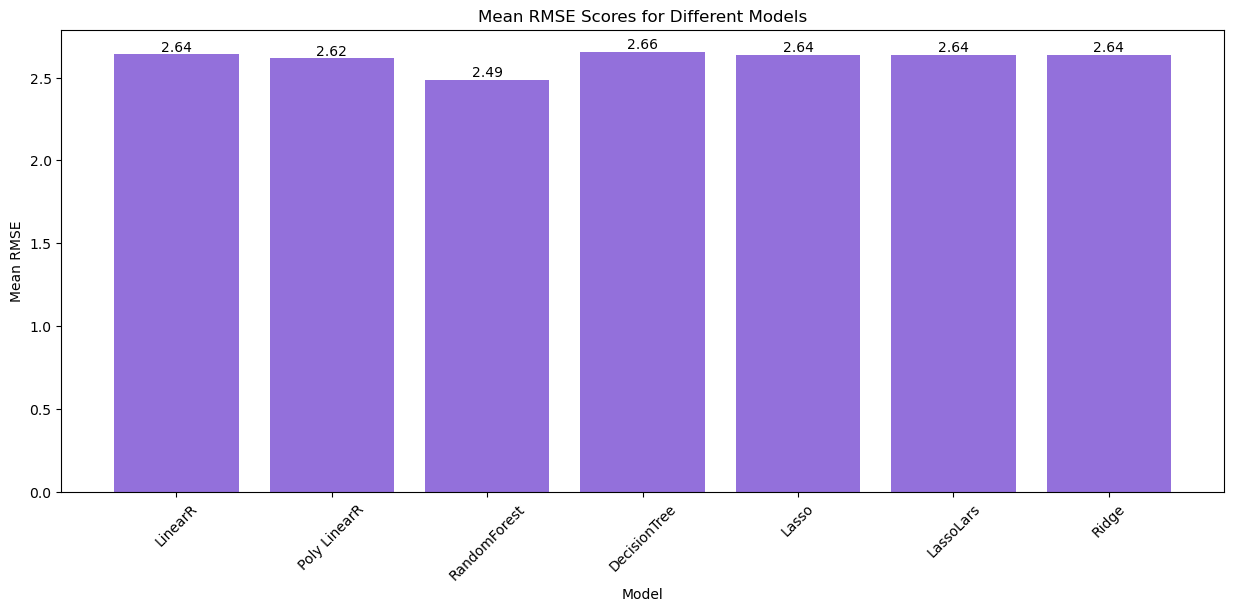

In [25]:
# Define the models
models = [
    'LinearR',
    'Poly LinearR',
    'RandomForest',
    'DecisionTree',
    'Lasso',
    'LassoLars',
    'Ridge'
]

# Create an empty list to store the mean RMSE scores
mean_rmse_scores = [linear_reg_mean_score, poly_reg_mean_score, randforest_reg_mean_score, dectree_reg_mean_score, lasso_reg_mean_score, lassolars_reg_mean_score, ridge_reg_mean_score]

# Plot the mean RMSE scores
plt.figure(figsize=(15, 6))
plt.bar(models, mean_rmse_scores, color='mediumpurple')
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE Scores for Different Models')

# Add annotations to the bars
for i, mean_rmse in enumerate(mean_rmse_scores):
    plt.text(i, mean_rmse, f'{mean_rmse:.2f}', ha='center', va='bottom') # type: ignore
    
plt.xticks(rotation=45)
plt.show()

### Conclution cross-validation

- As we can see the the results vary (see Chart above), with <b>Random Forest</b> beeing the best.
- Because Lasso, LassoLars and Ridge show no difference in the Mean Squared Error, we will not consider them in the anymore.

# Fine Tuning

## Search for best hyperparamters with GridSearchCV
Following cells will train the models again, but we will search vor the best configuration.

In [26]:
# get_params give the possible configuration. As we see with LinearRegression, there aren't any we can configure, so no GridSerchCV will be performed.
linear_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [27]:
polynomial_model.get_params()

{'memory': None,
 'steps': [('polynomial_features', PolynomialFeatures(include_bias=False)),
  ('linear_regression', LinearRegression())],
 'verbose': False,
 'polynomial_features': PolynomialFeatures(include_bias=False),
 'linear_regression': LinearRegression(),
 'polynomial_features__degree': 2,
 'polynomial_features__include_bias': False,
 'polynomial_features__interaction_only': False,
 'polynomial_features__order': 'C',
 'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': True,
 'linear_regression__n_jobs': None,
 'linear_regression__positive': False}

In [28]:
# there are two configurations which can be configuered, degree and bias
# therefor we generate a config

param_grid = {
'polynomial_features__degree': [1, 2, 3, 4, 5, 6], #!! with an mac m1 processor training a model with degree 14 takes 30 seconds and a model with degree 16 one minute.
'polynomial_features__include_bias': [True, False],
}

grid_search_pl = GridSearchCV(polynomial_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2) # add param verbose = 2 to see the state
grid_search_pl.fit(X_train, y_train)

poly_reg_mean_score = grid_search_pl.best_score_
print('Best estimator: ', grid_search_pl.best_estimator_)
print('Best params: ', grid_search_pl.best_params_)
print('Best Score: ', poly_reg_mean_score)

poly_reg_mean_score = -poly_reg_mean_score

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=False; total time=   0.0s
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=False; total time=   0.0s
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=False; total time=   0.0s
[CV] END polynomial_features__degree=1, polynomial_features__include_bias=False; total time=   0.0s
[CV] END polynomial_features__degree=1, poly

In [29]:
param_grid = {'max_depth': [10, 20, 30, 40, 50, 60],
'max_features': [2, 3, 4, 5, 6]
}

grid_search_rf = GridSearchCV(randomforest_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2) # add param verbose = 2 to see the state
grid_search_rf.fit(X_train, y_train)

randforest_reg_mean_score = grid_search_rf.best_score_
print('Best Estimator: ', grid_search_rf.best_estimator_)
print('Best Params: ', grid_search_rf.best_params_)
print('Best Score: ', randforest_reg_mean_score)
randforest_reg_mean_score = -randforest_reg_mean_score

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......................max_depth=10, max_features=2; total time=   0.1s
[CV] END .......................max_depth=10, max_features=2; total time=   0.1s
[CV] END .......................max_depth=10, max_features=2; total time=   0.1s
[CV] END .......................max_depth=10, max_features=2; total time=   0.1s
[CV] END .......................max_depth=10, max_features=2; total time=   0.1s
[CV] END .......................max_depth=10, max_features=3; total time=   0.1s
[CV] END .......................max_depth=10, max_features=3; total time=   0.1s
[CV] END .......................max_depth=10, max_features=3; total time=   0.1s
[CV] END .......................max_depth=10, max_features=3; total time=   0.1s
[CV] END .......................max_depth=10, max_features=3; total time=   0.1s
[CV] END .......................max_depth=10, max_features=4; total time=   0.1s
[CV] END .......................max_depth=10, m

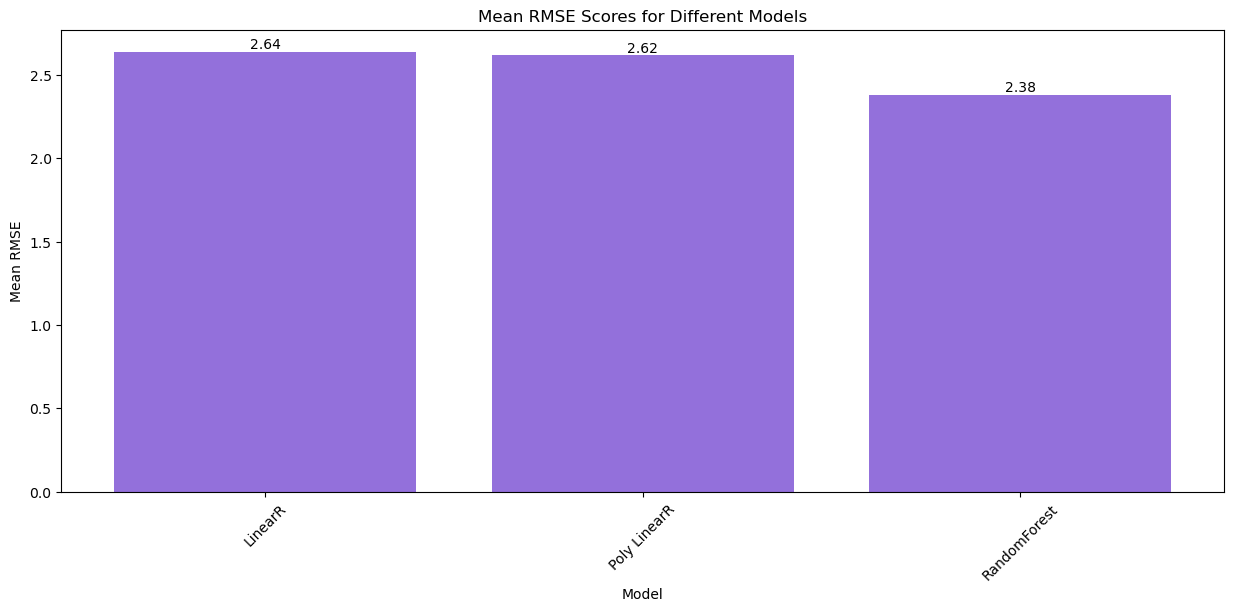

In [30]:
# Define the models
models = [
    'LinearR',
    'Poly LinearR',
    'RandomForest'
]

# Create an empty list to store the mean RMSE scores
mean_rmse_scores = [linear_reg_mean_score, poly_reg_mean_score, randforest_reg_mean_score]

# Plot the mean RMSE scores
plt.figure(figsize=(15, 6))
plt.bar(models, mean_rmse_scores, color='mediumpurple')
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE Scores for Different Models')

# Add annotations to the bars
for i, mean_rmse in enumerate(mean_rmse_scores):
    plt.text(i, mean_rmse, f'{mean_rmse:.2f}', ha='center', va='bottom') # type: ignore
    
plt.xticks(rotation=45)
plt.show()

### Conclution GridSearchCV

- As the GridSearchCV was partly already performed during the Modelcreation, there are no big changes. 
- The linear Regression is showing no changes
- The Poly Model is performing almost equally the same
- The Random Forest is performing a little bit better
- For the other models, as the GridSearch CV was already performed there are no changes as well

## Scaling
This section we will scale the data before comparing the models. We only will use StandardScaler.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Column names depending on the type of fit/transform that will be used
num_attribs = ['LengthofCycle', 'LengthofMenses', 'Age', 'Weight']
preprocessing = ColumnTransformer([('num', StandardScaler(), num_attribs)], remainder="passthrough")
FirstDayofHigh_scaler = StandardScaler()

X_scaled = preprocessing.fit_transform(dfmens1[['LengthofCycle',
                                                        'LengthofMenses',
                                                        'Age',
                                                        'Weight',
                                                        'Height']], )
y_scaled = FirstDayofHigh_scaler.fit_transform(dfmens1[['FirstDayofHigh']])



In [32]:
# Create train and test samples
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, 
                                                         dfmens1['FirstDayofHigh'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [33]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

scores = cross_val_score(linear_model, X_scaled_train, y_scaled_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(linear_model))

linear_reg_mean_score = np.mean(scores)

print(scores)
print(linear_reg_mean_score) 
linear_reg_mean_score = -linear_reg_mean_score

--LinearRegression()--
[-2.86851673 -2.41806697 -2.74097926 -2.61876203 -2.54940154]
-2.639145306535119


In [34]:
polynomial_model = Pipeline([
                                ("polynomial_features", PolynomialFeatures(degree=3, include_bias=True)),
                                ("linear_regression", LinearRegression()),
                            ])

scores = cross_val_score(polynomial_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(polynomial_model))

poly_reg_mean_score = np.mean(scores)
print(scores)
print(poly_reg_mean_score) 
poly_reg_mean_score = -poly_reg_mean_score

--Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=3)),
                ('linear_regression', LinearRegression())])--
[-2.7580185  -3.15983091 -2.63690798 -2.51640881 -2.46058908]
-2.70635105492597


In [35]:
randomforest_model = RandomForestRegressor(random_state=42, max_depth=10, max_features=3)
randomforest_model.fit(X_scaled_train, y_scaled_train)

scores = cross_val_score(randomforest_model, X_scaled_train, y_scaled_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(randomforest_model))

randforest_reg_mean_score = np.mean(scores)
print(scores)
print(randforest_reg_mean_score) 
randforest_reg_mean_score = -randforest_reg_mean_score

--RandomForestRegressor(max_depth=10, max_features=3, random_state=42)--
[-2.50757731 -2.34884273 -2.29226811 -2.47360538 -2.34229448]
-2.3929176017237808


In [36]:
# Fit Regression Model
decisionTreeRegressor = tree.DecisionTreeRegressor(max_depth=best_max_depth)
decisionTreeRegressor = decisionTreeRegressor.fit(X_scaled_train, y_scaled_train)

scores = cross_val_score(decisionTreeRegressor, X_scaled_train, y_scaled_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(decisionTreeRegressor))

dectree_reg_mean_score = np.mean(scores)
print(scores)
print(dectree_reg_mean_score) 
dectree_reg_mean_score = -dectree_reg_mean_score

--DecisionTreeRegressor(max_depth=6)--
[-2.54267206 -2.55286014 -2.55386519 -2.73275668 -2.86874127]
-2.6501790674260626


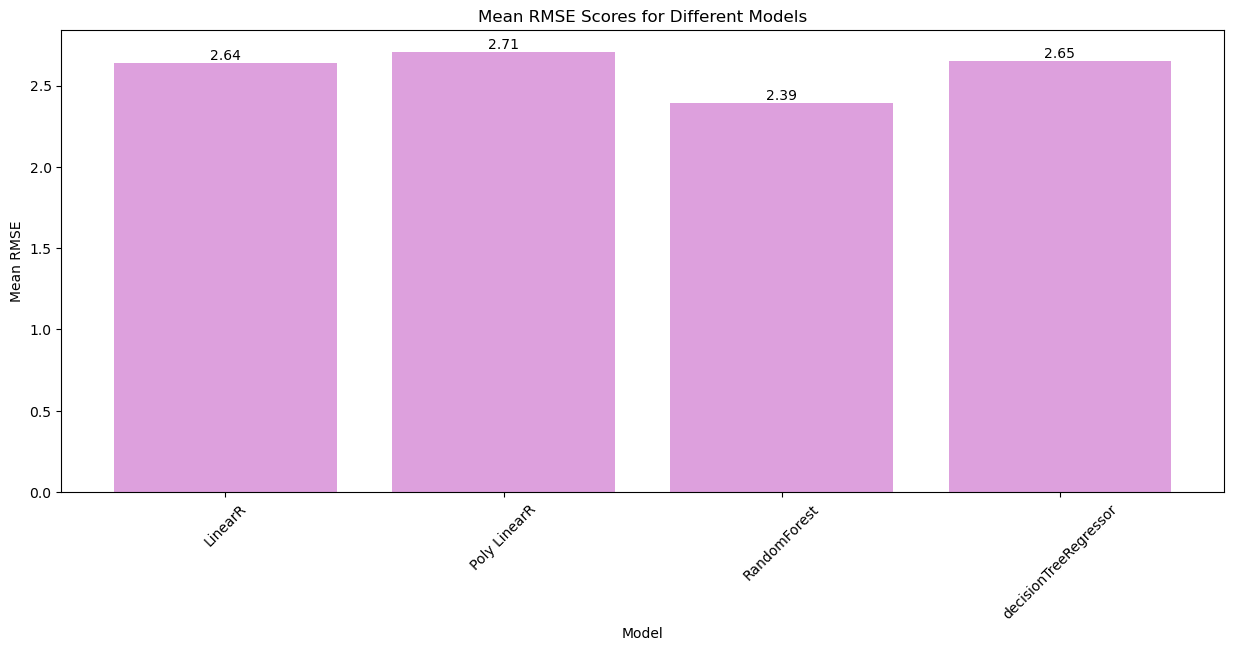

In [37]:
# Define the models
models = [
    'LinearR',
    'Poly LinearR',
    'RandomForest',
    'decisionTreeRegressor'
]

# Create an empty list to store the mean RMSE scores
mean_rmse_scores = [linear_reg_mean_score, poly_reg_mean_score, randforest_reg_mean_score, dectree_reg_mean_score]

# Plot the mean RMSE scores
plt.figure(figsize=(15, 6))
plt.bar(models, mean_rmse_scores, color='plum')
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE Scores for Different Models')

# Add annotations to the bars
for i, mean_rmse in enumerate(mean_rmse_scores):
    plt.text(i, mean_rmse, f'{mean_rmse:.2f}', ha='center', va='bottom') # type: ignore
    
plt.xticks(rotation=45)
plt.show()

### Conclution Scaling

- The result didn't change with scaling, which makes sense as with StandardScaling we don't change the distribution. The only model wich is slightly better is RandomForestRegression, but for decision trees scaling shouldn't have any effect and the improvements have to come from a better data split or other source.
- The model Decision Tree is now dropped because it's performing the worst

## Adding more data
- As I analyse Personal Data, it is difficult to receive more Datapoints. My mother lend me her Folder with old menstrual Cycles of herself.
- As she tracked her Cycle in her 20s and 30s, the data is stored physically in a Folder and is old data. But as the menstrual Cycle didn't change in the last many years, this shouldn't be a problem!
- Because the folder is not digitalised, I store the data directly in the dataframe.

In [38]:
data = [['nfp002', 1, 30, 1, 16, 3, 6, 50, 160, 29], 
        ['nfp002', 2, 32, 1, 16, 3, 7, 50, 160, 29], 
        ['nfp002', 3, 30, 1, 15, 3, 5, 50, 160, 29], 
        ['nfp002', 4, 30, 1, 15, 3, 5, 50, 160, 29],
        ['nfp002', 5, 31, 1, 16, 5, 6, 50, 160, 29],
        ['nfp002', 6, 25, 1, 16, 3, 5, 50, 160, 29],
        ['nfp002', 7, 31, 1, 15, 2, 5, 50, 160, 29],
        ['nfp002', 8, 31, 1, 18, 3, 3, 50, 160, 29],
        ['nfp002', 9, 30, 1, 18, 3, 6, 50, 160, 29],
        ['nfp002', 10, 32, 1, 13, 18, 6, 50, 160, 28],
        ['nfp002', 11, 33, 1, 16, 4, 6, 50, 160, 28],
        ['nfp002', 12, 33, 1, 16, 4, 6, 50, 160, 28],
        ['nfp002', 13, 31, 1, 15, 4, 6, 50, 160, 28],
        ['nfp002', 14, 34, 1, 18, 5, 7, 50, 160, 28],
        ['nfp002', 15, 33, 1, 19, 4, 6, 50, 160, 28],
        ['nfp002', 16, 34, 1, 23, 3, 5, 50, 160, 28]]
columns = ['ClientID', 'CycleNumber', 'LengthofCycle', 'CycleWithPeakorNot', 'FirstDayofHigh', 'TotalNumberofHighDays', 'LengthofMenses', 'Weight', 'Height', 'Age']

dfmoreData = pd.DataFrame(data, columns=columns)
dfmoreData.head(5)

,ClientID,CycleNumber,LengthofCycle,CycleWithPeakorNot,FirstDayofHigh,TotalNumberofHighDays,LengthofMenses,Weight,Height,Age
0,nfp002,1,30,1,16,3,6,50,160,29
1,nfp002,2,32,1,16,3,7,50,160,29
2,nfp002,3,30,1,15,3,5,50,160,29
3,nfp002,4,30,1,15,3,5,50,160,29
4,nfp002,5,31,1,16,5,6,50,160,29


In [39]:
dfmens1.shape

(1665, 16)

In [40]:
dfmens2 = pd.concat([dfmens1, dfmoreData])
dfmens2.head(5)

,ClientID,CycleNumber,LengthofCycle,lengthCycle_cat,CycleWithPeakorNot,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,lengthMenses_cat,Age,Height,Weight,BMI
0,nfp8122,1,29,28 - 32,1.0,17.0,12.0,12,5,9.0,5,Normal,36.0,160.02,54.43,21.25
1,nfp8122,2,27,28 - 32,1.0,15.0,12.0,13,2,6.0,5,Normal,36.0,160.02,54.43,21.25
2,nfp8122,3,29,28 - 32,1.0,15.0,14.0,11,1,5.0,5,Normal,36.0,160.02,54.43,21.25
3,nfp8122,4,27,28 - 32,1.0,15.0,12.0,13,2,6.0,5,Normal,36.0,160.02,54.43,21.25
4,nfp8122,5,28,28 - 32,1.0,16.0,12.0,12,4,8.0,5,Normal,36.0,160.02,54.43,21.25


In [41]:
dfmens2.shape

(1681, 16)

In [42]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(dfmens2[['LengthofCycle',
                                                        'LengthofMenses',
                                                        'Age',
                                                        'Weight',
                                                        'Height']], 
                                                         dfmens2['FirstDayofHigh'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [43]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

scores = cross_val_score(linear_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(linear_model))

linear_reg_mean_score = np.mean(scores)
print(scores)
print(linear_reg_mean_score)
linear_reg_mean_score = -linear_reg_mean_score

--LinearRegression()--
[-2.86845489 -2.67521604 -2.43176667 -2.75546898 -2.53234833]
-2.6526509834678613


In [44]:
polynomial_model = Pipeline([
                                ("polynomial_features", PolynomialFeatures(degree=best_degree)),
                                ("linear_regression", LinearRegression()),
                            ])

scores = cross_val_score(polynomial_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(polynomial_model))

poly_reg_mean_score = np.mean(scores)
print(scores)
print(poly_reg_mean_score) 
poly_reg_mean_score = -poly_reg_mean_score

--Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])--
[-2.81317033 -2.63302844 -2.40426558 -2.72926912 -2.51971362]
-2.6198894204147543


In [45]:
randomforest_model = RandomForestRegressor(random_state=42)

scores = cross_val_score(randomforest_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(randomforest_model))

randforest_reg_mean_score = np.mean(scores)
print(scores)
print(randforest_reg_mean_score)
randforest_reg_mean_score = -randforest_reg_mean_score 
print("Standard deviation: ", scores.std())

randomforest_model.fit(X_train, y_train)
print(mean_squared_error(y_test, randomforest_model.predict(X_test),squared=False))

print(np.mean(scores)) 

--RandomForestRegressor(random_state=42)--
[-2.74562975 -2.78002712 -2.11774317 -2.66029104 -2.48770509]
-2.5582792327889963
Standard deviation:  0.24237635113554293
2.552528125222795
-2.5582792327889963


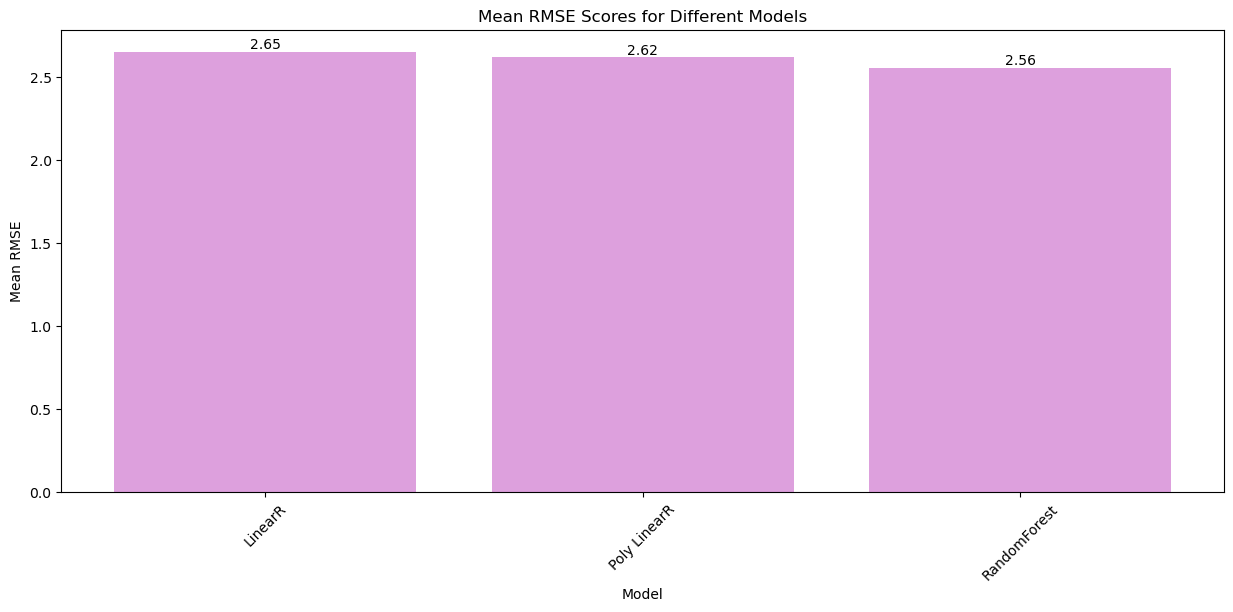

In [46]:
# Define the models
models = [
    'LinearR',
    'Poly LinearR',
    'RandomForest'
]

# Create an empty list to store the mean RMSE scores
mean_rmse_scores = [linear_reg_mean_score, poly_reg_mean_score, randforest_reg_mean_score]

# Plot the mean RMSE scores
plt.figure(figsize=(15, 6))
plt.bar(models, mean_rmse_scores, color='plum')
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE Scores for Different Models')

# Add annotations to the bars
for i, mean_rmse in enumerate(mean_rmse_scores):
    plt.text(i, mean_rmse, f'{mean_rmse:.2f}', ha='center', va='bottom') # type: ignore
    
plt.xticks(rotation=45)
plt.show()

### Conclusion adding more data

- As we see, the models performe worse when adding more data (but not that much worse)
- There are only little differences

## Analysis of data and Errors

In this step we will analyse the data an the corresponding errors.

The following steps will be performed.

- get the most important features used by random forest.
- analyse  the rows with the highest error 

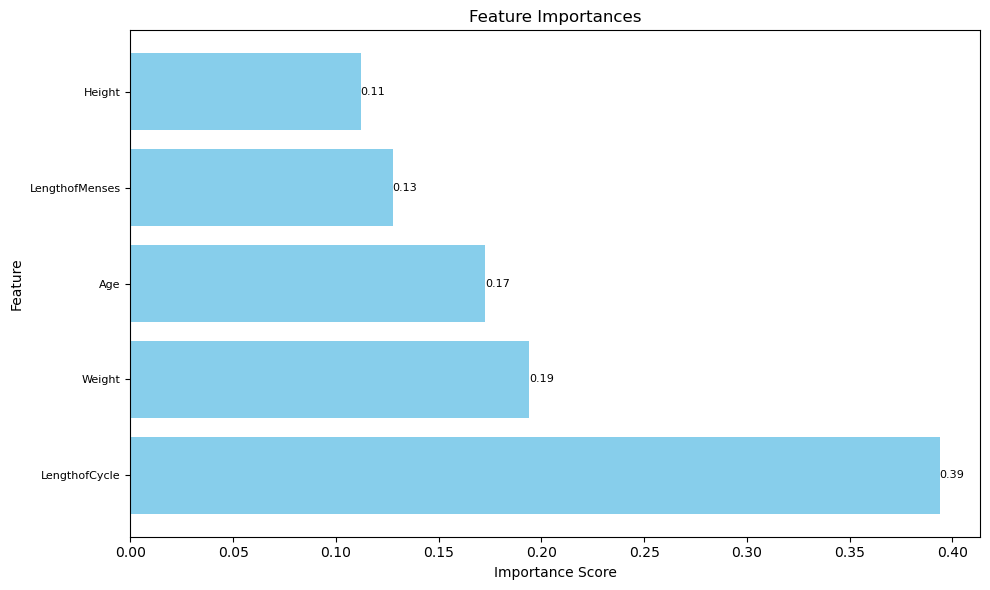

['LengthofCycle', 'LengthofMenses', 'Age', 'Weight', 'Height']
[0.3937043  0.19392726 0.17267333 0.12762958 0.11206553]


In [47]:
# Get feature importances
importances = randomforest_model.feature_importances_

# Get feature names
feature_names = X_train.columns.tolist()

# Sort feature importances in descending order. 
# The feature importances represent the importance or contribution of each feature in making predictions
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], color='skyblue')
plt.yticks(range(len(importances)), np.array(feature_names)[indices], fontsize=8)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Add values to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

# Print col-names and importances-values
print(feature_names)
print( importances[indices] )

In [48]:
X_train.columns

Index(['LengthofCycle', 'LengthofMenses', 'Age', 'Weight', 'Height'], dtype='object')

In [49]:
# get all predictions for the training set.
y_train_predict = cross_val_predict(randomforest_model, X_train, y_train, cv=5)
df_new = pd.DataFrame(X_train, columns=X_train.columns, copy=True)
df_new['error'] = np.abs(y_train_predict - y_train)
df_new['FirstDayofHigh'] = y_train
df_new['predicted_FirstDayofHigh'] = y_train_predict

# Add text, postalcode and town name
# we use join instead of merge, because we 'join' on the index column and do not perform a merge using a specific column
df_new = df_new.join(dfmens1[['BMI', 'EstimatedDayofOvulation', 'LengthofLutealPhase']])

print(dfmens1.shape)
sorted_df = df_new.sort_values('error', ascending=False)
sorted_df.head()

(1665, 16)


,LengthofCycle,LengthofMenses,Age,Weight,Height,error,FirstDayofHigh,predicted_FirstDayofHigh,BMI,EstimatedDayofOvulation,LengthofLutealPhase
760,33,5,32.0,73.03,165.10,13.028500,26,12.971500,26.79,15,13
1613,36,6,23.0,49.90,160.02,11.810000,7,18.810000,22.46,9,27
635,32,6,27.0,54.43,170.18,11.284048,22,10.715952,18.79,24,8
1624,36,6,23.0,49.90,160.02,10.515000,20,9.485000,22.46,23,13
723,35,6,35.0,83.91,167.64,10.195000,22,11.805000,29.86,24,11


In [50]:
# check which feature has the largest errors.
sorted_df[(sorted_df['error'] > 10)].groupby(['LengthofCycle', 'LengthofMenses']).size().sort_values(ascending=False)

LengthofCycle  LengthofMenses
36             6                 2
32             6                 1
33             5                 1
35             6                 1
dtype: int64

As it seems, this are just some Cycles, that have a longer Durance than the standard 30 Days. Therefore, no further Cleaning needs to be done.

Text(0.5, 1.0, 'Histogram of model residuals')

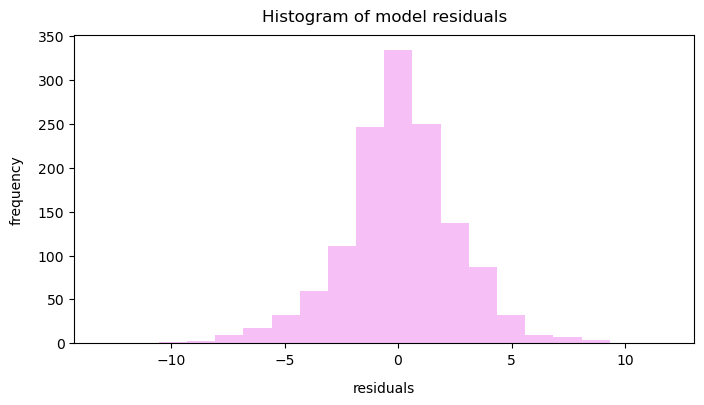

In [51]:
y_train_predict = cross_val_predict(randomforest_model, X_train, y_train, cv=5)
y_residuals = y_train_predict - y_train
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=y_residuals, 
                            bins=20, 
                            color='violet',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)


## Abgleich Trainings- und Testdaten betr. Over- und Underfitting

In [57]:
# use linear regression to fit (train) and then predict the results.
# This time use the train/test values from the cell above, which has multiple variables as X
# The function mean_squared_error(y_test, y_predicted) can be used to calculate the mean squared error
# calc the residuals and save the values in the variable "y_residuals"

y_predict = randomforest_model.predict(X_test)

# Testdaten:
print('train mean_squared_error {}'.format(mean_squared_error(y_train, y_train_predict)))
print('train root_mean_squared_error {}'.format(np.sqrt(mean_squared_error(y_train, y_train_predict))))

print('')

#Trainingdaten:
print("test mean_squared_error ", mean_squared_error(y_test, y_predict))
print("test root_mean_squared_error ", np.sqrt(mean_squared_error(y_test, y_predict)))

train mean_squared_error 7.014112437856177
train root_mean_squared_error 2.6484169682767433

test mean_squared_error  6.515399830053396
test root_mean_squared_error  2.552528125222795


### Erkenntnis:
Da die Testdaten im Vergleich zu den Traingingsdaten ziemlich ähnlich sind, kann davon ausgegangen werden, dass kein Overfitting der Fall ist im Modell. Und da generell der Error sehr tief ist, kann auch davon ausgegangen werden, dass kein Underfitting stattfindet (das Modell passt sehr gut, deswegen gibt es auch tiefe Differenzen/Residuals).

## Further Ways to Fine Tune Model:

- Get a more complex model: as the model already works very well with the linear Regression model, the model itself is not the problem. But I could search for a more complex problem, that has a bigger variety in the data than this.
- Feature engineering: As my values are already very stanardised and of type int, there are not many options.
- Get more data: This is a possibility. I also have already added some more data, but as my target Variable already doesn't vary that much, there doesn't has to be a lot of more data. Also, I don't have more information about date / time or location points, so I cannot add more data (like moon phases or so)

- Data cleaning: Not needed. Our dataset is already very clean and has only int values
- Pipelines: Used in Poly Model
- Scaling: Done
- Grid Search: Done

In [53]:
import pickle

# save model to file
model_filename = "../backend/randomforest_regression.pkl"
with open(model_filename, mode="bw") as f:
    pickle.dump(randomforest_model, file=f)

Analysis of Data

In [54]:
# Make predictions on the test data
y_pred = randomforest_model.predict(X_test)

In [55]:
# Create a DataFrame to store the predicted and observed values
comparison_df = pd.DataFrame({'Observed': y_test, 'Predicted': y_pred})

# Convert arrays to Pandas Series
y_pred_series = pd.Series(y_pred)
y_test_series = pd.Series(y_test)

# Create a  DataFrame to store the predicted and observed values
comparison_df = pd.DataFrame({'Observed': y_test_series, 'Predicted': y_pred_series})

for i in range(10):
    print(f'Predicted ovulation day: {y_pred_series.iloc[i]:.1f}, Observed ovulation day: {y_test_series.iloc[i]:.1f}')

Predicted ovulation day: 11.1, Observed ovulation day: 9.0
Predicted ovulation day: 10.7, Observed ovulation day: 10.0
Predicted ovulation day: 8.3, Observed ovulation day: 7.0
Predicted ovulation day: 10.8, Observed ovulation day: 11.0
Predicted ovulation day: 13.3, Observed ovulation day: 10.0
Predicted ovulation day: 10.2, Observed ovulation day: 10.0
Predicted ovulation day: 15.9, Observed ovulation day: 16.0
Predicted ovulation day: 11.6, Observed ovulation day: 9.0
Predicted ovulation day: 13.1, Observed ovulation day: 12.0
Predicted ovulation day: 11.5, Observed ovulation day: 9.0


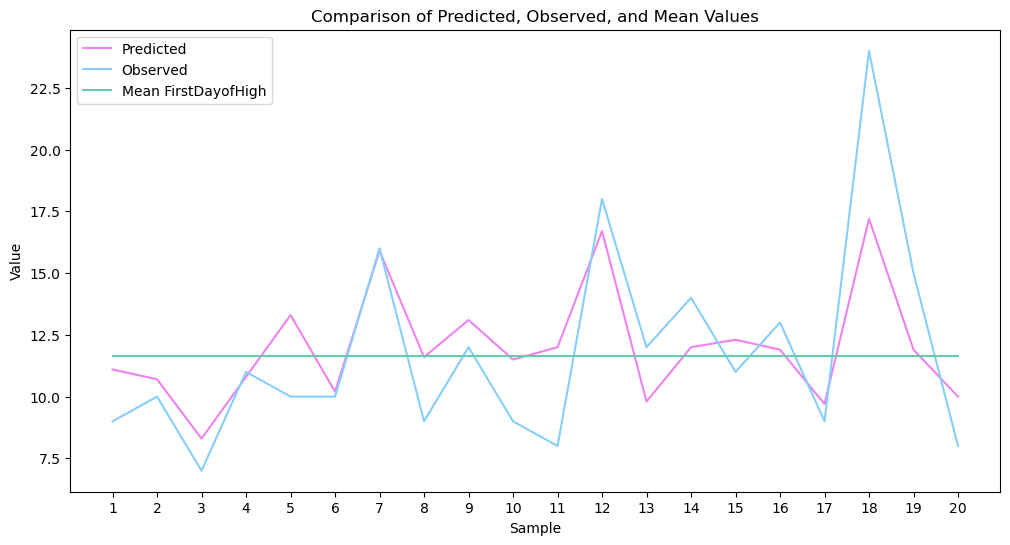

In [56]:
# Create model predictions for test data
predicted = y_pred_series.round(1)

# Extract the first 10 predicted and observed values
predicted_subset = predicted.iloc[:20]
y_test_subset = y_test.iloc[:20]

# Calculate the mean value of 'FirstDayofHigh'
mean_value = dfmens1.FirstDayofHigh.mean()

# Create an array of x-coordinates for the data points
x = range(1, len(predicted_subset) + 1)

# Set the figure size to make the graph wider
plt.figure(figsize=(12, 6))

# Plot the predicted and observed values
plt.plot(x, predicted_subset, color='violet', label='Predicted')
plt.plot(x, y_test_subset, color='lightskyblue', label='Observed')
plt.plot(x, [mean_value] * len(x), color='mediumaquamarine', label='Mean FirstDayofHigh')

# Set labels and title
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Predicted, Observed, and Mean Values')

# Set x-axis tick frequency to 1
plt.xticks(range(1, len(predicted_subset) + 1, 1))

# Add a legend
plt.legend()

# Display the plot
plt.show()